
## Task 2
Create a PowerPoint presentation wihch outlines the approach we will be taking to identify which of the 1000 customers Sprocket Central Pty Ltd should target, based on this dataset. Explain the three phases:  Data Exploration; Model Development and Interpretation.


Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.



For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

--
Tips: Raw data fields may be transformed into other calculated fields for modelling purposes (i.e. converting D.O.B to age or age groups).  Tips: You may source external data from the ABS / Census to add additional variables that may help support your model.


#### list_price : The list price, also known as the manufacturer's suggested retail price (MSRP), or the recommended retail price (RRP)
#### standard_cost :Standard costs are estimates of the actual costs in a company's production process, because actual costs cannot be known in advance.

#### clustering customers by the buisness value they generate

### Objectives

##### 1) Find high value customers
##### 2) Determine customer trends and behaviour
##### 3) which of these 1000 new customers should be targeted to drive the most value for the organisation
##### 4) Data Exploration; Model Development and Interpretation- PPT on the project approach(understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting)

##### can customers be clustered based on their value?


In [1]:
## Customer profiling and segmentation is usually done through based on the RF- measure. i.e recency and frequency

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import matplotlib 
import DataReporter
%run -i DataReporter.py
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
excelFile = pd.ExcelFile("newData.xlsx")   

In [4]:
Transactions = pd.read_excel(excelFile, 'Transactions', skiprows=[0]) 
CustomerDemographic = pd.read_excel(excelFile,'CustomerDemographic', skiprows=[0]) 
CustomerAddress = pd.read_excel(excelFile, 'CustomerAddress', skiprows=[0])
newCustomers = pd.read_excel(excelFile,"NewCustomerList", skiprows = [0])
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",None) 

C:\Users\vishu\AppData\Local\Temp/ipykernel_13504/3329635272.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  CustomerDemographic = pd.read_excel(excelFile,'CustomerDemographic', skiprows=[0])
C:\Users\vishu\AppData\Local\Temp/ipykernel_13504/3329635272.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  newCustomers = pd.read_excel(excelFile,"NewCustomerList", skiprows = [0])


In [5]:
df = pd.merge(CustomerDemographic,CustomerAddress, on="customer_id")  
df = pd.merge(Transactions,df, on="customer_id") 
df.to_csv("customerData.csv") 

In [6]:
df = df.drop(axis=1,columns=["default","country"])

In [7]:
filt = (df["gender"] == "Femal") | (df["gender"] == "Female")
df.loc[filt,"gender"] = "F"
filt = (df["gender"] == "Male")
df.loc[filt,"gender"] = "M"

In [8]:
filt = (df["state"] == "Victoria")
df.loc[filt,"state"] = "VIC"
filt = (df["state"] == "New South Wales")
df.loc[filt,"state"] = "NSW"

In [9]:
# print(df.shape)
# df = df.dropna()
# print(df.shape)

In [10]:
df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6


In [11]:
df['online_order'].value_counts()

1.0    9818
0.0    9791
Name: online_order, dtype: int64

In [12]:
df['transaction_month'] = pd.DatetimeIndex(df['transaction_date']).month
df["profit"] = df.apply(lambda x: x["list_price"] - x["standard_cost"], axis = 1)
df['age'] = (pd.Timestamp("now") - df['DOB']).astype('<m8[Y]') 

demographics =[]
Geographic  = []

In [13]:
df = df[["transaction_id","product_id","customer_id","online_order","order_status","brand","product_line","product_class","product_size","gender","past_3_years_bike_related_purchases","DOB","job_title","job_industry_category","wealth_segment","deceased_indicator","owns_car","tenure","state","property_valuation","transaction_month","profit"]]

In [14]:
df.to_csv("Final.csv")

In [15]:
df.head(0)

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,transaction_month,profit


In [18]:
import DataReporter
%run -i DataReporter.py
report = Report(df)

NameError: name 'fig' is not defined

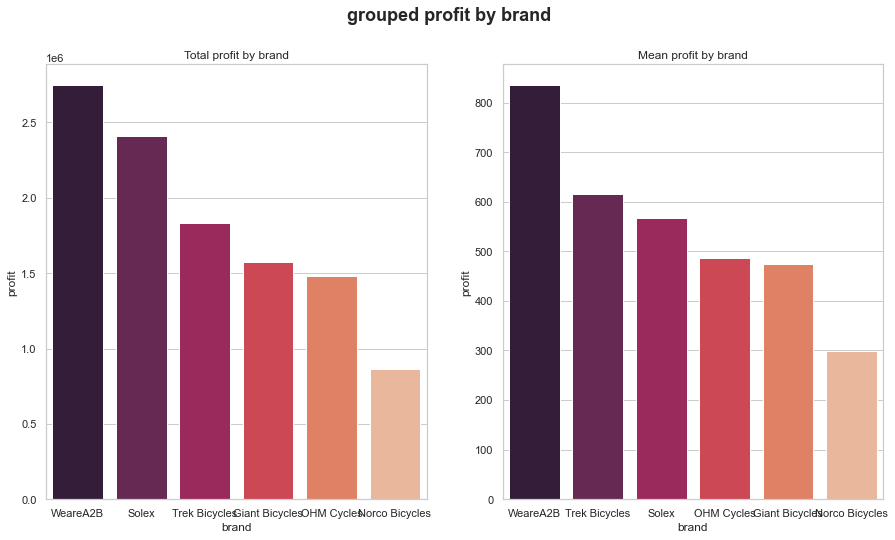

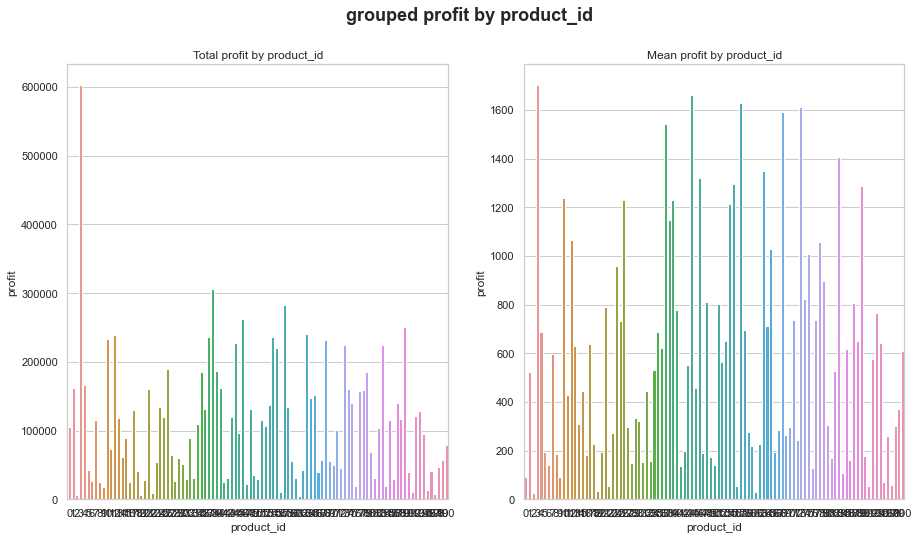

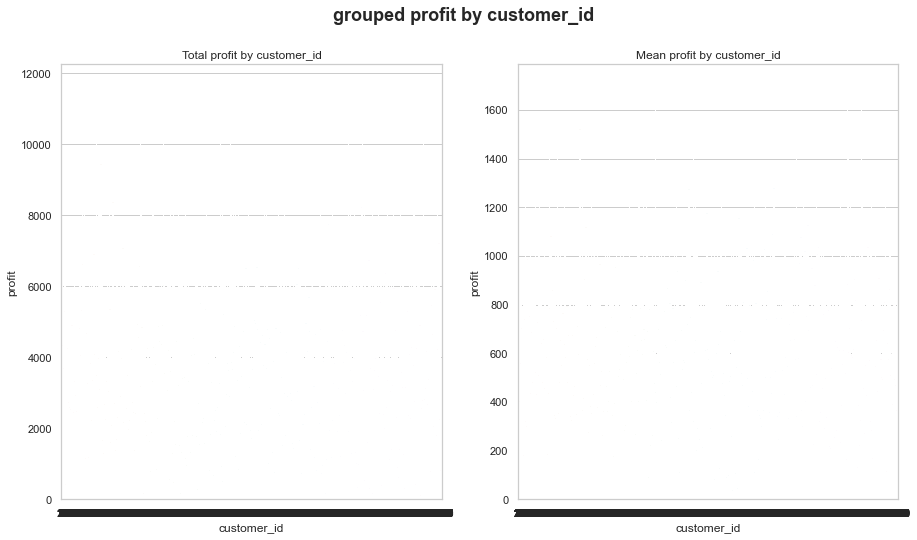

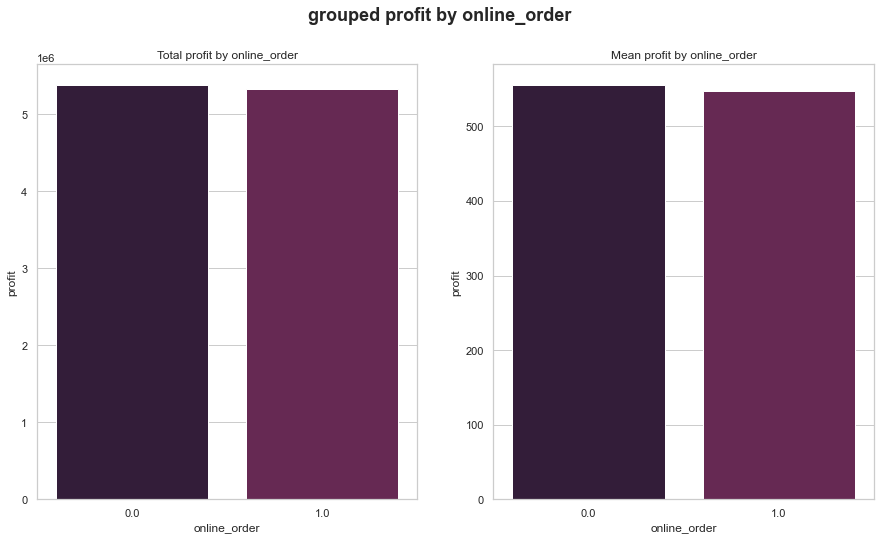

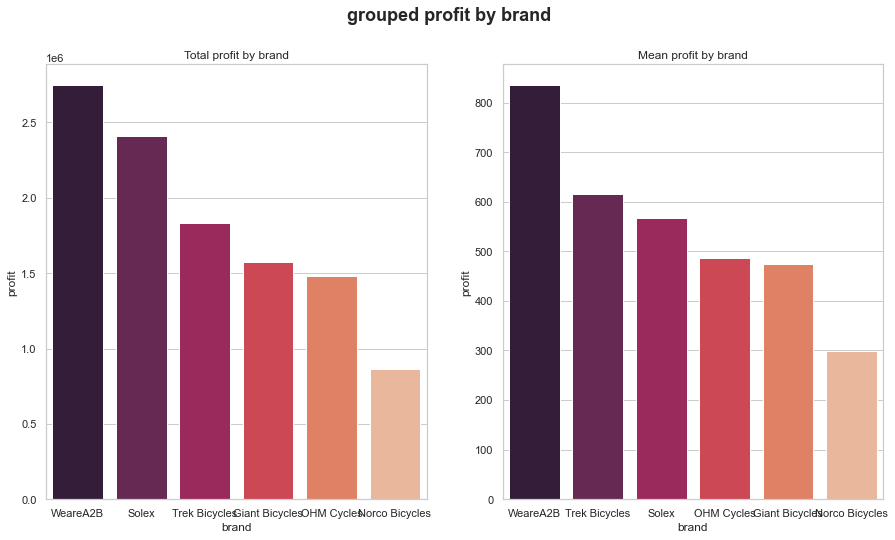

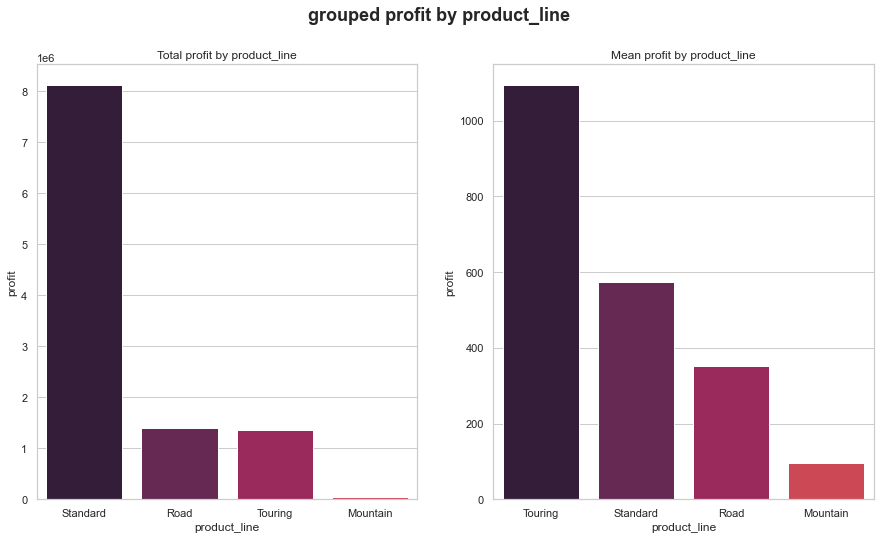

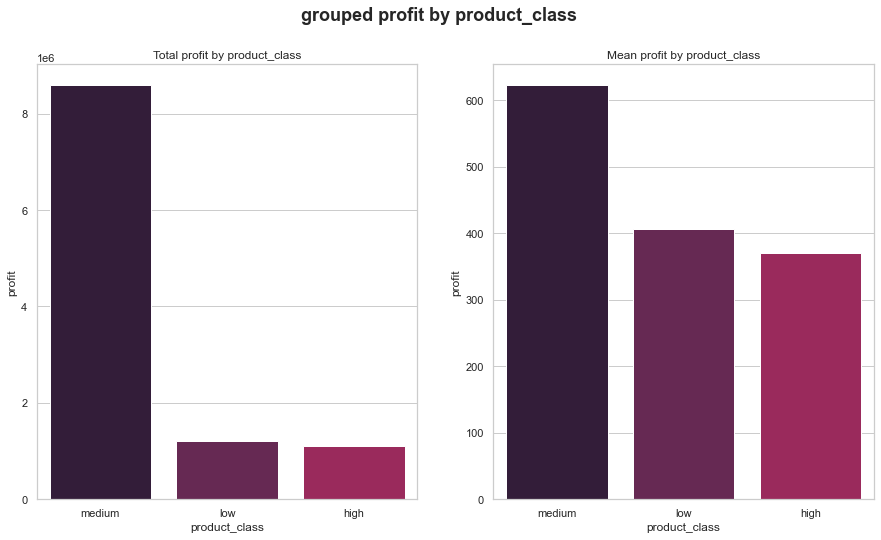

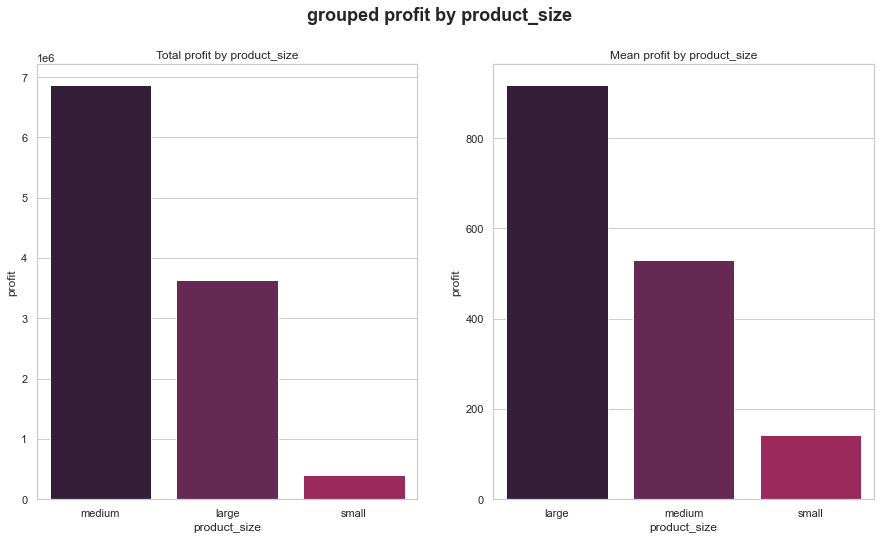

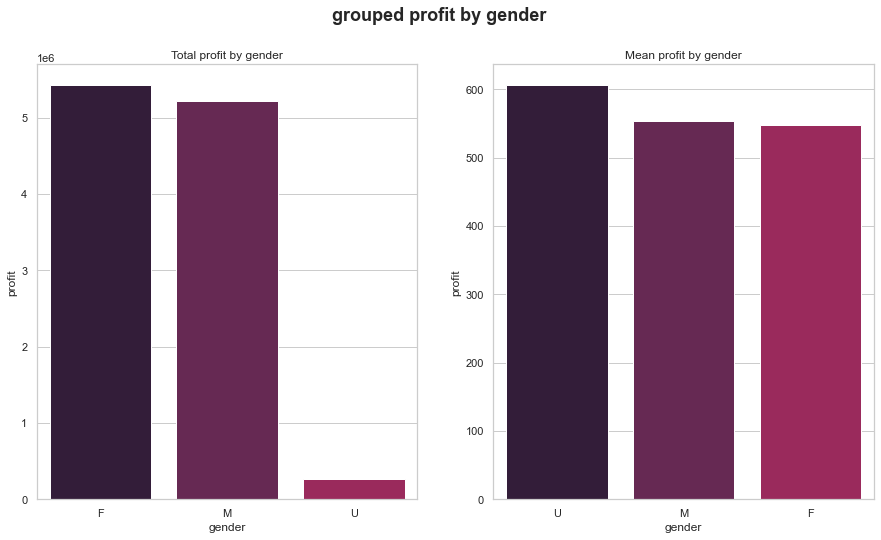

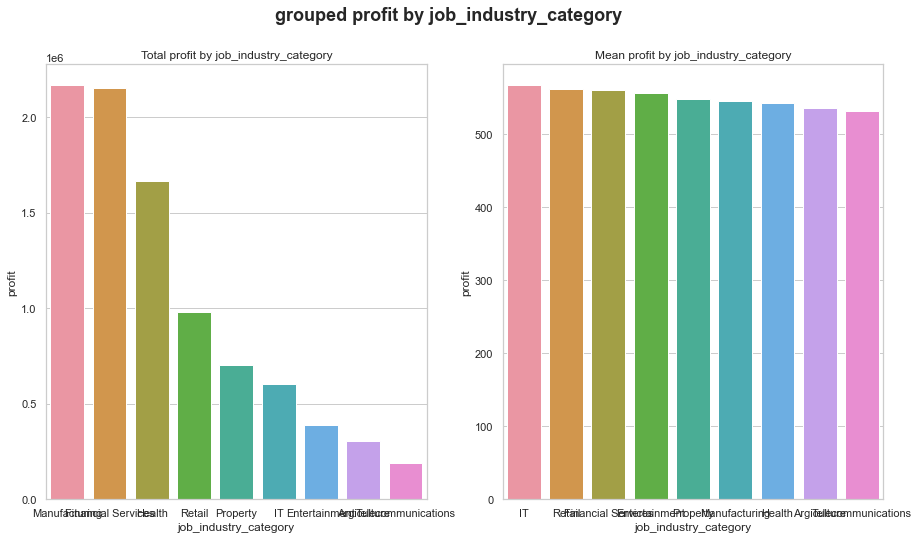

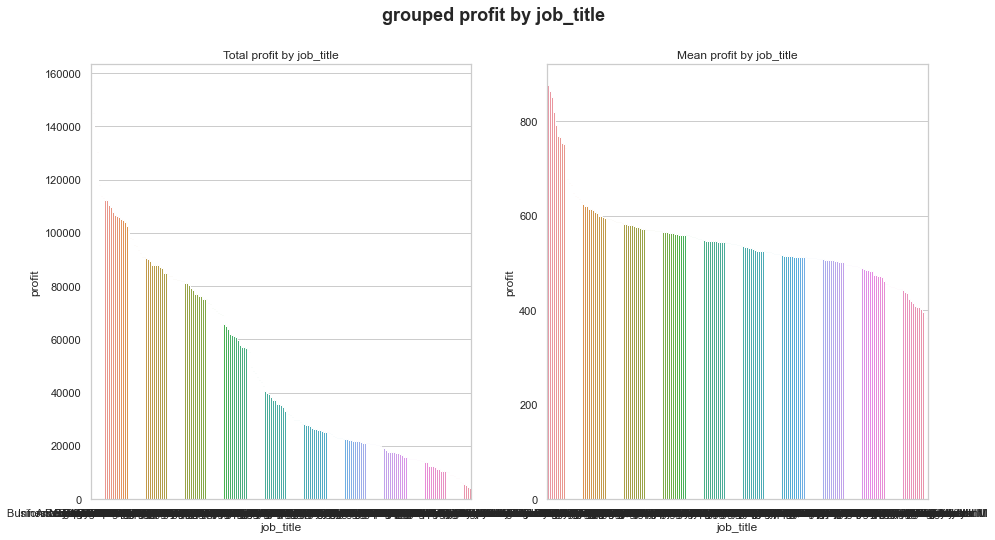

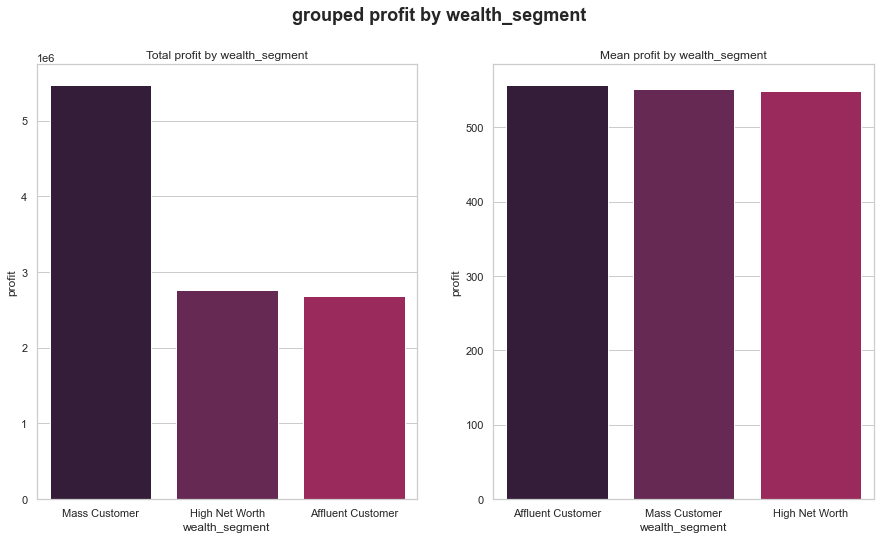

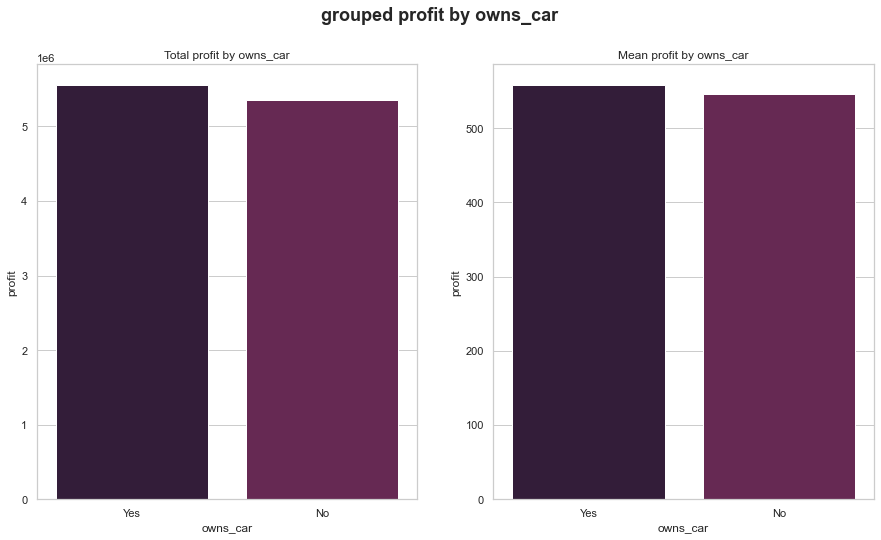

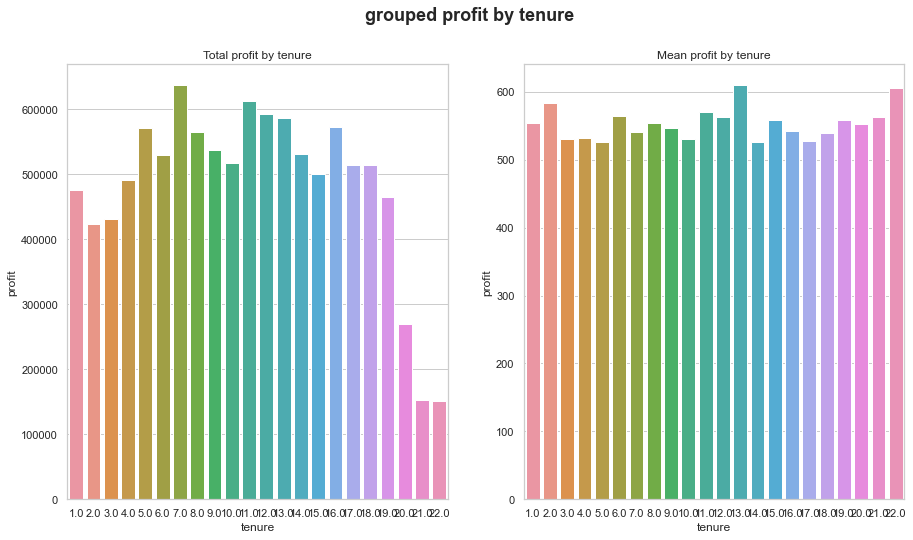

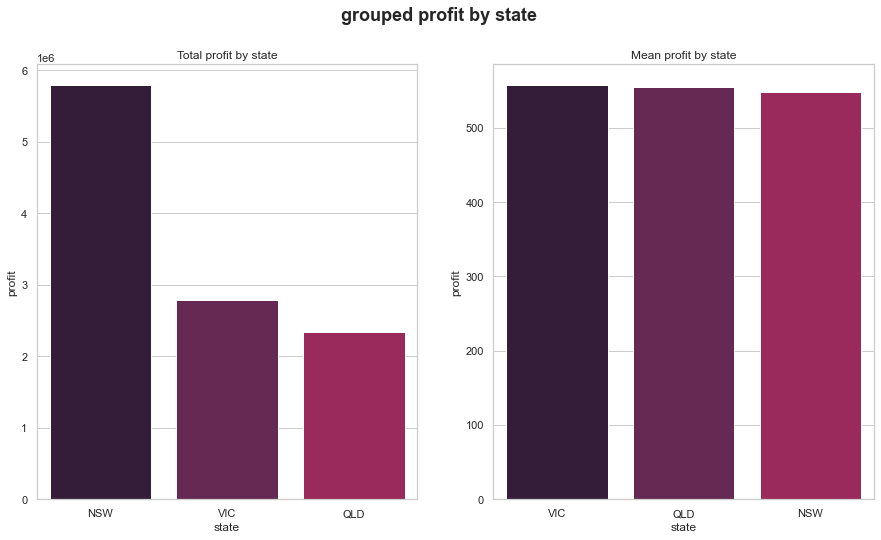

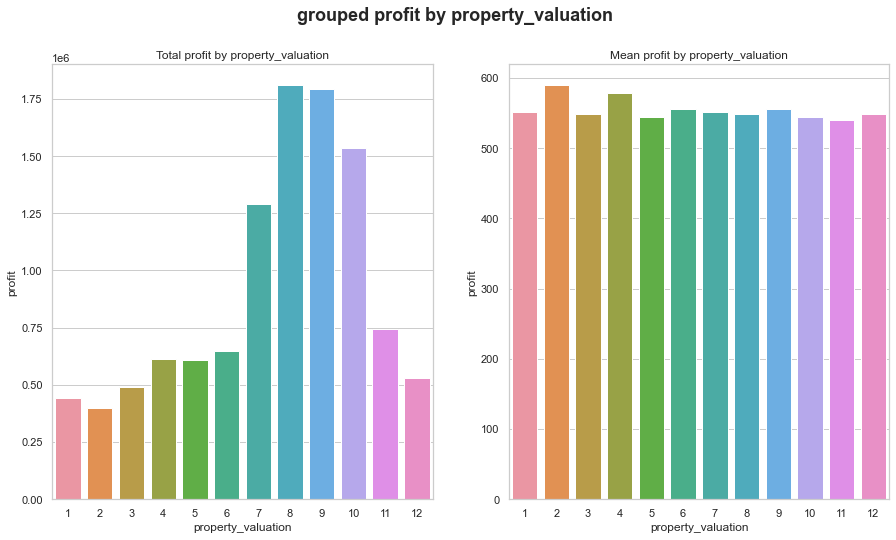

In [19]:
groupby = ["brand","product_id","customer_id","online_order","brand","product_line","product_class","product_size","gender","job_industry_category","job_title","wealth_segment","owns_car","tenure","state","property_valuation"]
measures = ["profit"]
for group in groupby:
    for measure in measures:
        report.groupByPlot(group,measure)

In [15]:
df.head()

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,transaction_month,profit
0,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,2,17.87
1,11065,1,2950,0.0,Approved,Giant Bicycles,Standard,medium,medium,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,10,448.68
2,18923,62,2950,0.0,Approved,Solex,Standard,medium,medium,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6,4,179.44
3,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,F,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,5,1702.55
4,6862,4,3120,0.0,Approved,Giant Bicycles,Standard,high,medium,F,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5,10,451.65


<Figure size 1080x360 with 0 Axes>

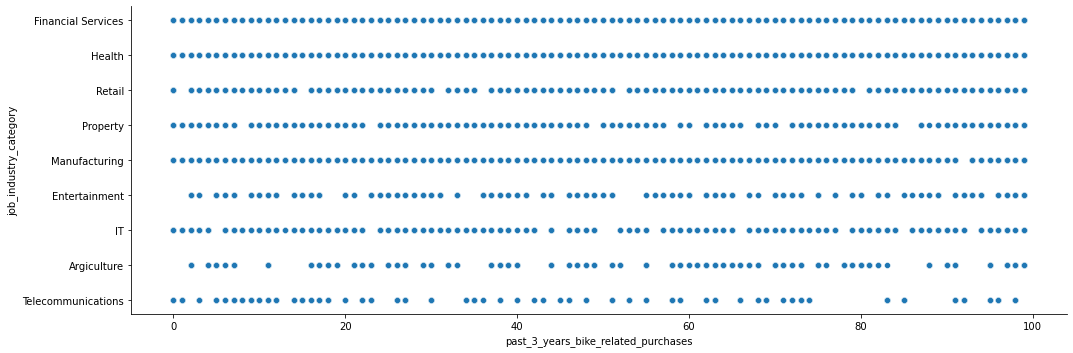

In [15]:
plt.figure(figsize=(15,5))
sns.relplot(x=column1,y=column2,data=df, height = 5,aspect = 3)

In [16]:
report.eda()
#data.groupby(["customer_id"])["profit"].sum().sort_values(ascending = False)       # 3489

 Size of the data set is (19968, 22) 


column:  transaction_id
Number of Unique values: 19968
min = 1, max = 20000, range = 19999

column:  product_id
Number of Unique values: 101
min = 0, max = 100, range = 100

column:  customer_id
Number of Unique values: 3489
min = 1, max = 3500, range = 3499

column:  online_order
Number of Unique values: 3
min = 0.0, max = 1.0, range = 1.0
List
 [ 0.  1. nan]

column:  order_status
Number of Unique values: 2
List
 ['Approved' 'Cancelled']

column:  brand
Number of Unique values: 7
List
 ['Solex' 'Giant Bicycles' 'Trek Bicycles' 'WeareA2B' 'OHM Cycles'
 'Norco Bicycles' nan]

column:  product_line
Number of Unique values: 5
List
 ['Standard' 'Road' 'Touring' 'Mountain' nan]

column:  product_class
Number of Unique values: 4
List
 ['medium' 'high' 'low' nan]

column:  product_size
Number of Unique values: 4
List
 ['medium' 'large' 'small' nan]

column:  gender
Number of Unique values: 3
List
 ['M' 'F' 'U']

column:  past_3_years_bike_related_purch

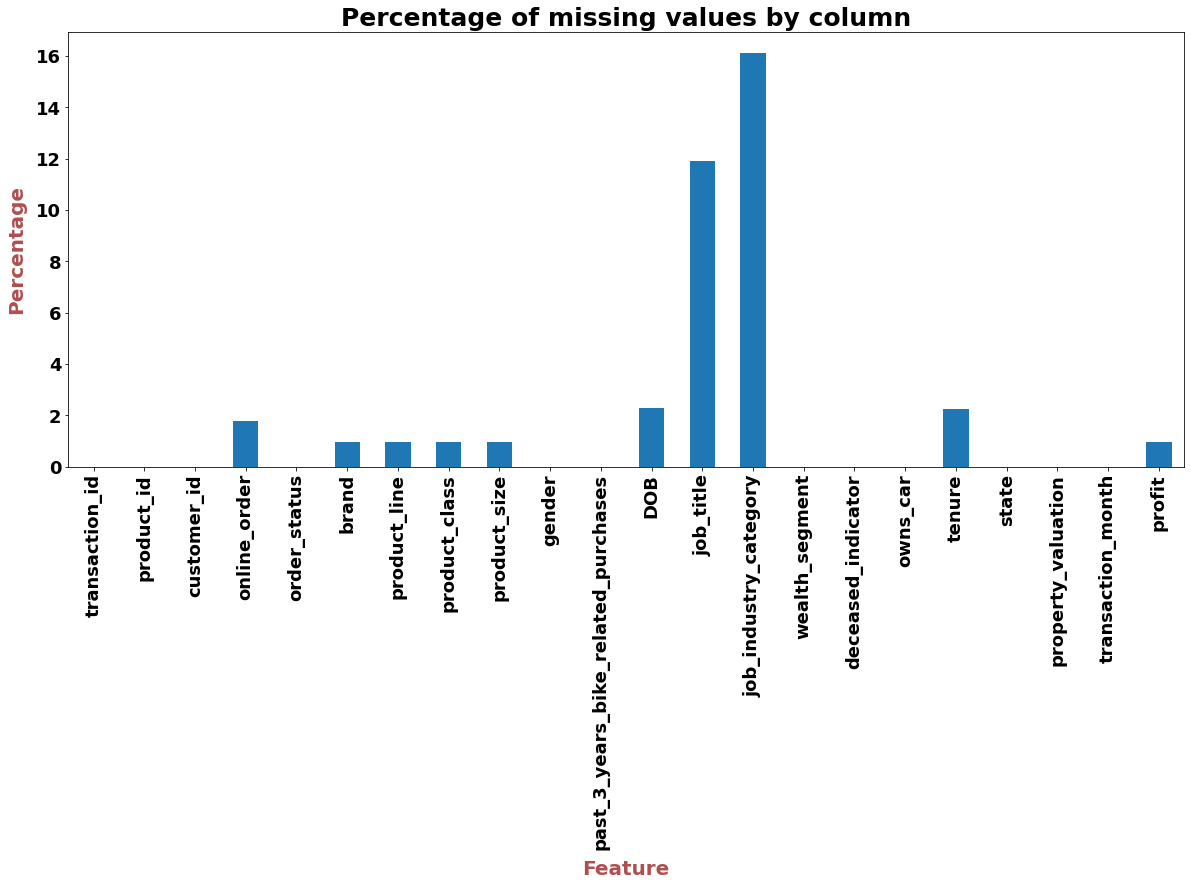

In [17]:
report.missing()

In [18]:
#report.univarDist()